<a href="https://colab.research.google.com/github/dhruvsethi98/Machine-Learning-models-for-Flight-Price-Analysis/blob/main/Flight_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Airline Fares using various ML models**

### Importing Libraries and basic exploration

In [123]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [124]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [125]:
train_data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Flight Analysis/Data_Train.xlsx')

In [126]:
train_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [127]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [128]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

### Dropping missing values

In [129]:
train_data.dropna(inplace=True)

In [130]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [131]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

### converting data type of column from object to date, departure time and arrival time

In [132]:
def change_into_datetime(col):
  train_data[col] = pd.to_datetime(train_data[col])

In [133]:
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
  change_into_datetime(i)

In [134]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

### extracting info from doj

In [135]:
train_data['journey_day'] = train_data['Date_of_Journey'].dt.day
train_data['journey_month'] = train_data['Date_of_Journey'].dt.month
train_data['journey_year'] = train_data['Date_of_Journey'].dt.year

In [136]:
train_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-08-16 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-08-16 05:50:00,2021-08-16 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


 ### dropping doj as extracted everything from it

In [137]:
train_data.drop('Date_of_Journey',axis=1,inplace=True)

### extracting departure and arrival time only


In [138]:
def extract_hour(df,col):
  df[col + '_hour'] = df[col].dt.hour

def extract_min(df,col):
  df[col + '_minute'] = df[col].dt.minute

### dropping departure and arrival column

In [139]:
def drop_column(df,col):
  df.drop(col,axis=1,inplace=True)

In [140]:
extract_hour(train_data,'Dep_Time')
extract_min(train_data,'Dep_Time')
drop_column(train_data,'Dep_Time')

In [141]:
extract_hour(train_data,'Arrival_Time')
extract_min(train_data,'Arrival_Time')
drop_column(train_data,'Arrival_Time')

In [142]:
train_data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15


### converting duration to list to train ML model and dropping duration column

In [143]:
duration = list(train_data['Duration'])

In [144]:
for i in range(len(duration)):
  if len(duration[i].split(' '))==2:                         #when 2 items already present in list
    pass
  else:
    if 'h' in duration[i]:                                   #when only hour present
      duration[i] = duration[i] + ' ' + '0m'
    else:                                                     #when only minute present
      duration[i] = '0h' + ' ' + duration[i]

In [145]:
train_data['Duration'] = duration

In [146]:
train_data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25


In [147]:
def gethour(x):
  return x.split(' ')[0][0:-1]                #to retrieve hour in numeric value

def getmin(x):
  return x.split(' ')[1][0:-1]                #to retrieve minute in numeric value

In [148]:
train_data['Duration_hours'] = train_data['Duration'].apply(gethour)
train_data['Duration_minutes'] = train_data['Duration'].apply(getmin)

In [149]:
train_data.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45


In [150]:
drop_column(train_data,'Duration')

In [151]:
train_data.head(5)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45


In [152]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              10682 non-null  object
 1   Source               10682 non-null  object
 2   Destination          10682 non-null  object
 3   Route                10682 non-null  object
 4   Total_Stops          10682 non-null  object
 5   Additional_Info      10682 non-null  object
 6   Price                10682 non-null  int64 
 7   journey_day          10682 non-null  int64 
 8   journey_month        10682 non-null  int64 
 9   journey_year         10682 non-null  int64 
 10  Dep_Time_hour        10682 non-null  int64 
 11  Dep_Time_minute      10682 non-null  int64 
 12  Arrival_Time_hour    10682 non-null  int64 
 13  Arrival_Time_minute  10682 non-null  int64 
 14  Duration_hours       10682 non-null  object
 15  Duration_minutes     10682 non-null  object
dtypes: i

In [153]:
train_data['Duration_hours'] = train_data['Duration_hours'].astype(int)
train_data['Duration_minutes'] = train_data['Duration_minutes'].astype(int)

In [154]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              10682 non-null  object
 1   Source               10682 non-null  object
 2   Destination          10682 non-null  object
 3   Route                10682 non-null  object
 4   Total_Stops          10682 non-null  object
 5   Additional_Info      10682 non-null  object
 6   Price                10682 non-null  int64 
 7   journey_day          10682 non-null  int64 
 8   journey_month        10682 non-null  int64 
 9   journey_year         10682 non-null  int64 
 10  Dep_Time_hour        10682 non-null  int64 
 11  Dep_Time_minute      10682 non-null  int64 
 12  Arrival_Time_hour    10682 non-null  int64 
 13  Arrival_Time_minute  10682 non-null  int64 
 14  Duration_hours       10682 non-null  int64 
 15  Duration_minutes     10682 non-null  int64 
dtypes: i

### separating categorical data and continuous data

In [155]:
cat_data = [col for col in train_data.columns if train_data[col].dtype == 'O']        

In [156]:
cont_data = [col for col in train_data.columns if train_data[col].dtype != 'O'] 

In [157]:
cat_data

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [158]:
cont_data

['Price',
 'journey_day',
 'journey_month',
 'journey_year',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_minutes']

In [159]:
cat = train_data[cat_data]

In [160]:
cat.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [161]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45


In [162]:
cat['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

### Plotting boxplots and other graphs to visualise

In [163]:
t1 = train_data.copy()

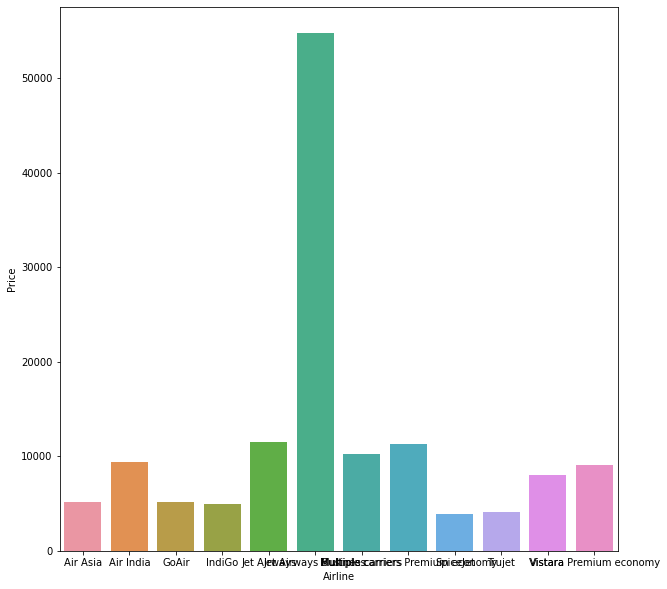

In [164]:
gg=t1.groupby('Airline')['Price'].agg('median').reset_index()
sb.barplot(x='Airline',y='Price', data=gg)
plt.rcParams['figure.figsize']=50,20  #graphsize
plt.show()

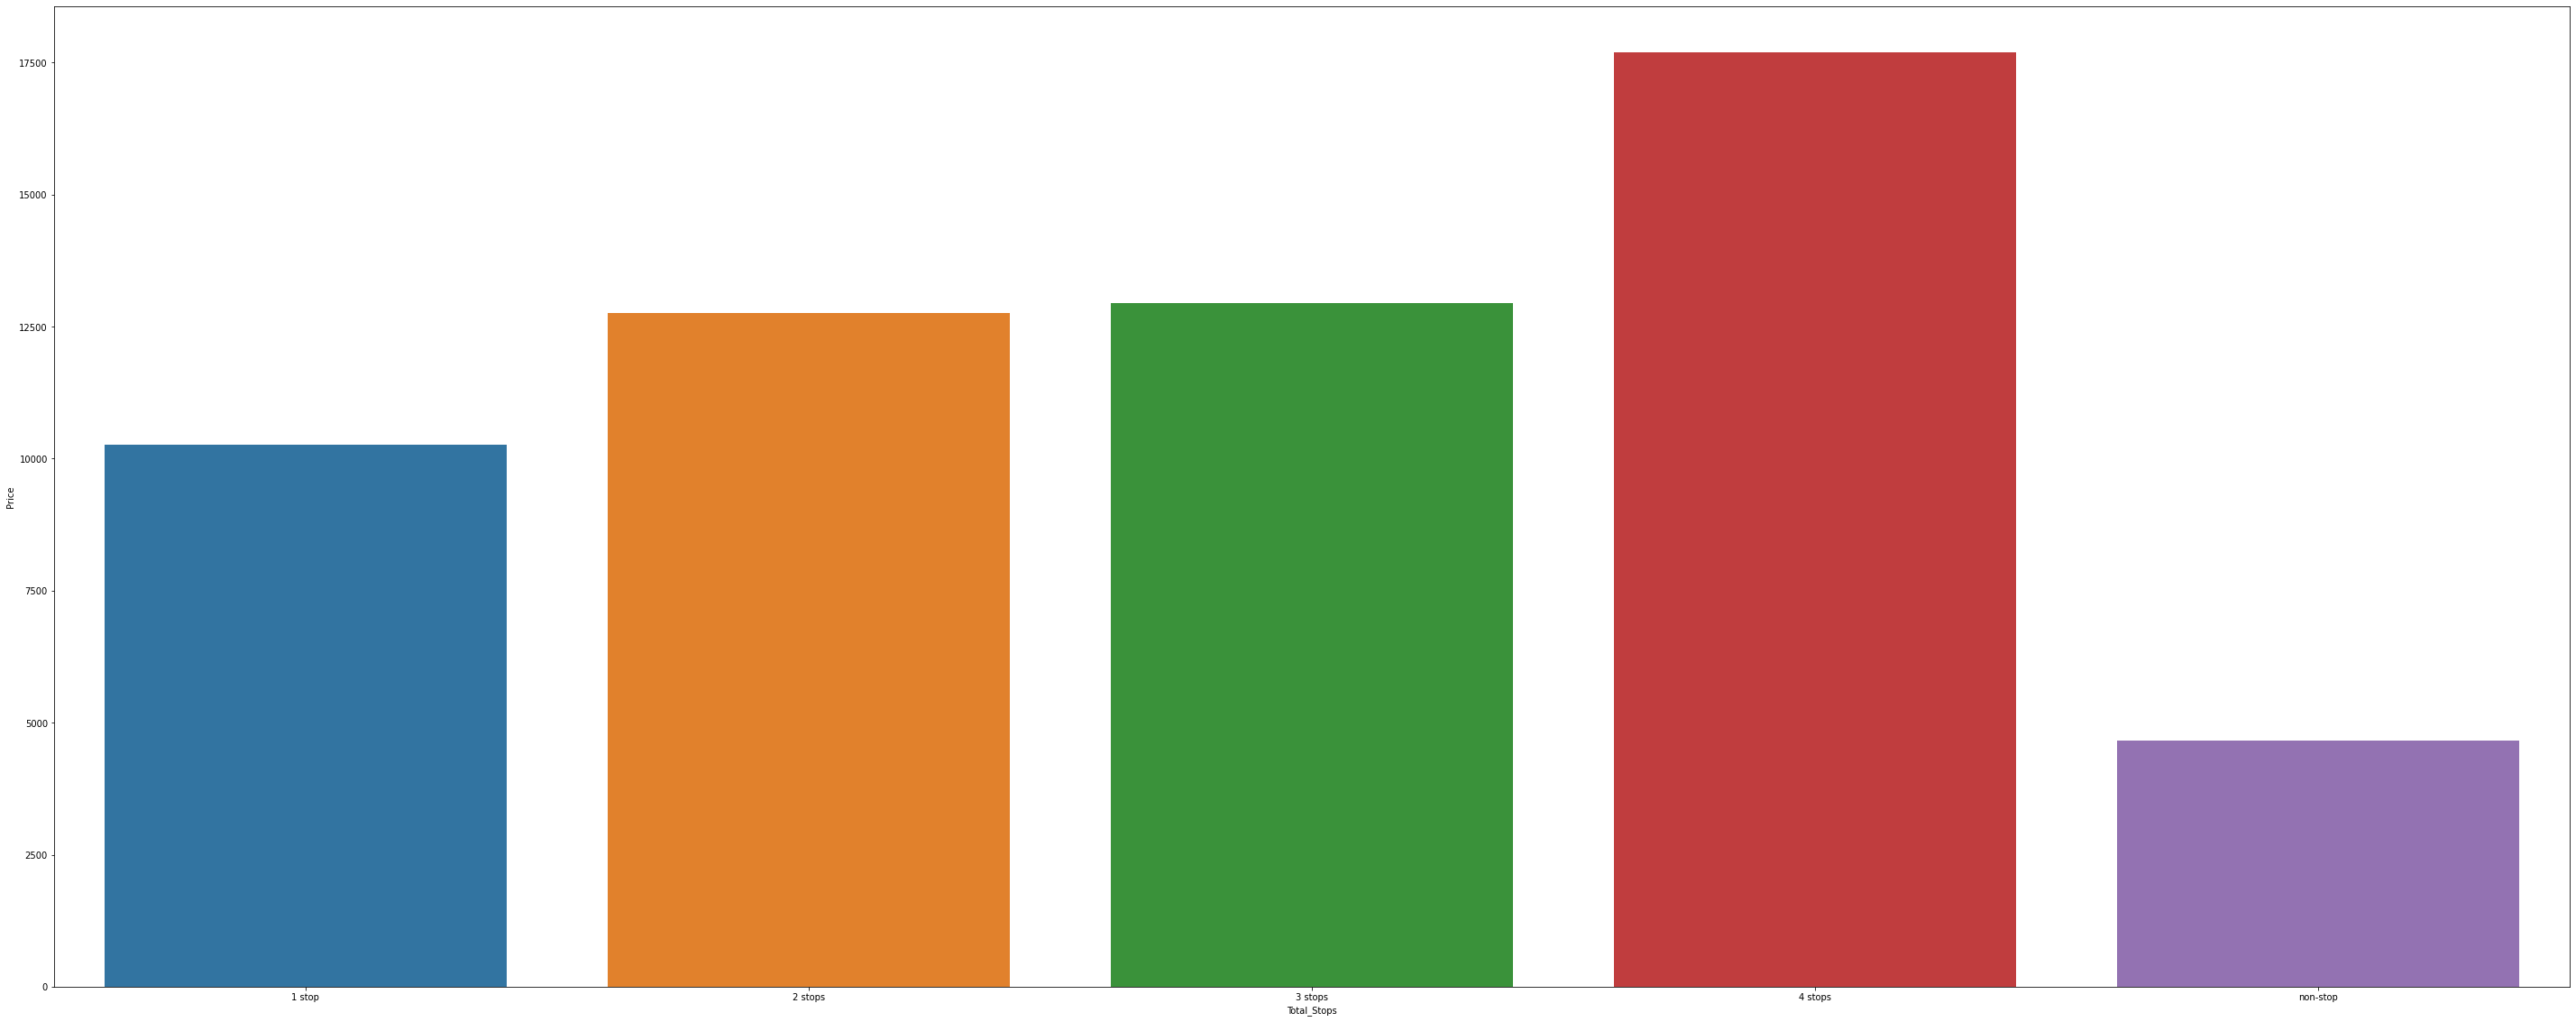

In [165]:
gg=t1.groupby('Total_Stops')['Price'].agg('median').reset_index()
sb.barplot(x='Total_Stops',y='Price', data=gg)
plt.rcParams['figure.figsize']=5,5  #graphsize
plt.show()

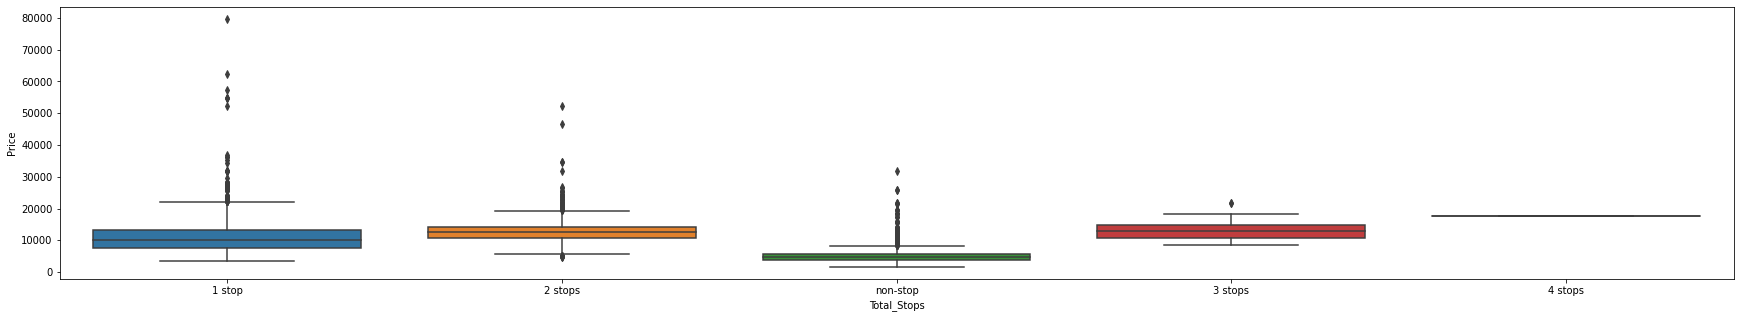

In [166]:
plt.figure(figsize = (30,5))
sb.boxplot(x = 'Total_Stops', y = 'Price', data = train_data.sort_values('Price', ascending=False))

In [167]:
airline = pd.get_dummies(cat['Airline'],drop_first = True)        #drop first = true to avoid creating an extra column by dummy variable

In [168]:
airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


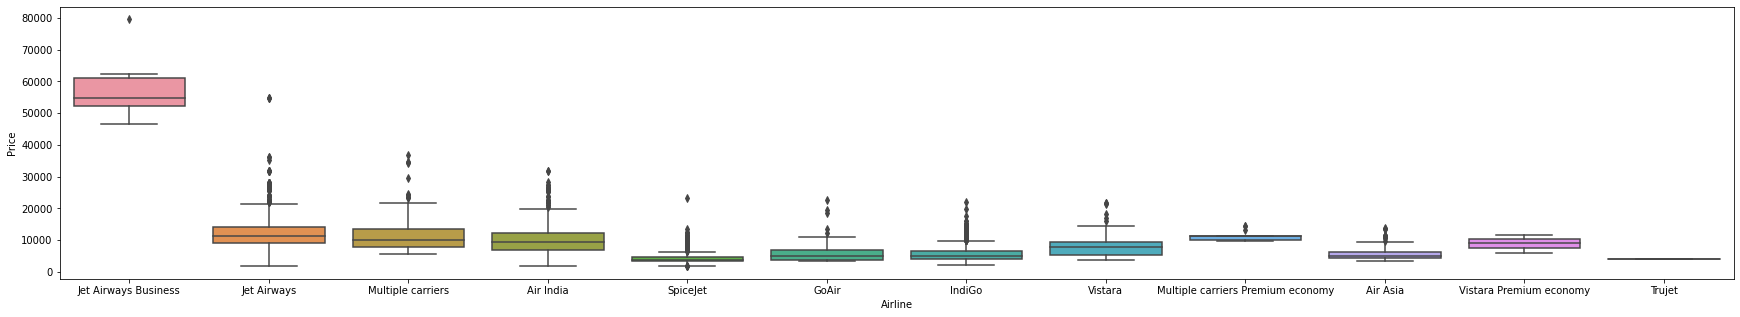

In [169]:
plt.figure(figsize = (30,5))
sb.boxplot(x = 'Airline', y = 'Price', data = train_data.sort_values('Price', ascending=False))

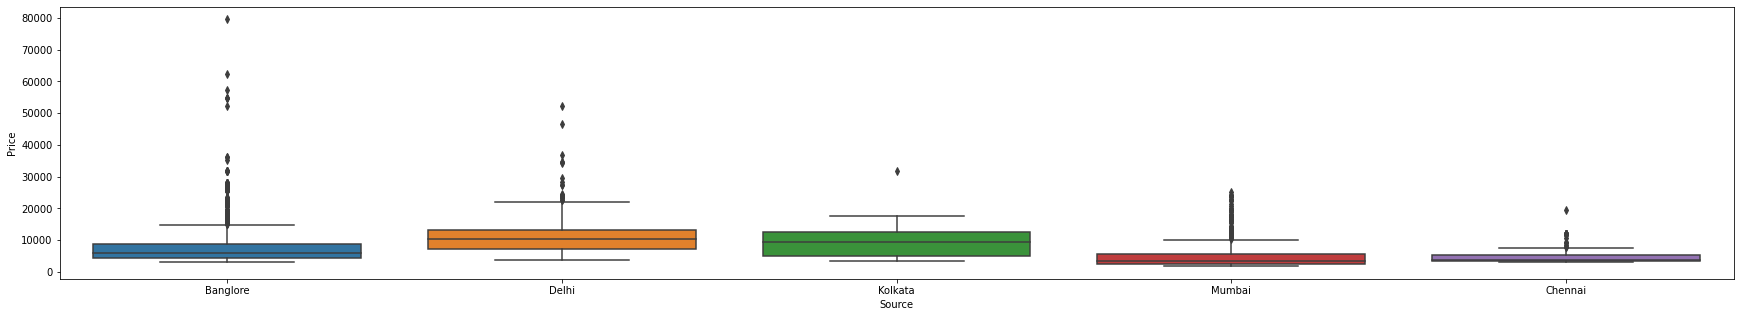

In [170]:
plt.figure(figsize = (30,5))
sb.boxplot(x = 'Source', y = 'Price', data = train_data.sort_values('Price', ascending=False))

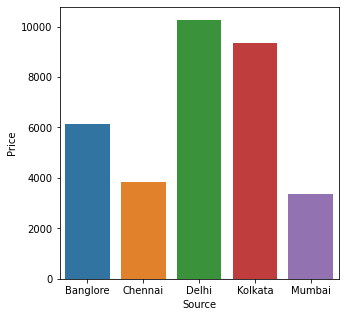

In [171]:
gg=t1.groupby('Source')['Price'].agg('median').reset_index()
sb.barplot(x='Source',y='Price', data=gg)
plt.rcParams['figure.figsize']=5,5  #graphsize
plt.show()

In [172]:
source = pd.get_dummies(cat['Source'],drop_first = True)        #drop first = true to avoid creating an extra column by dummy variable

In [173]:
source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


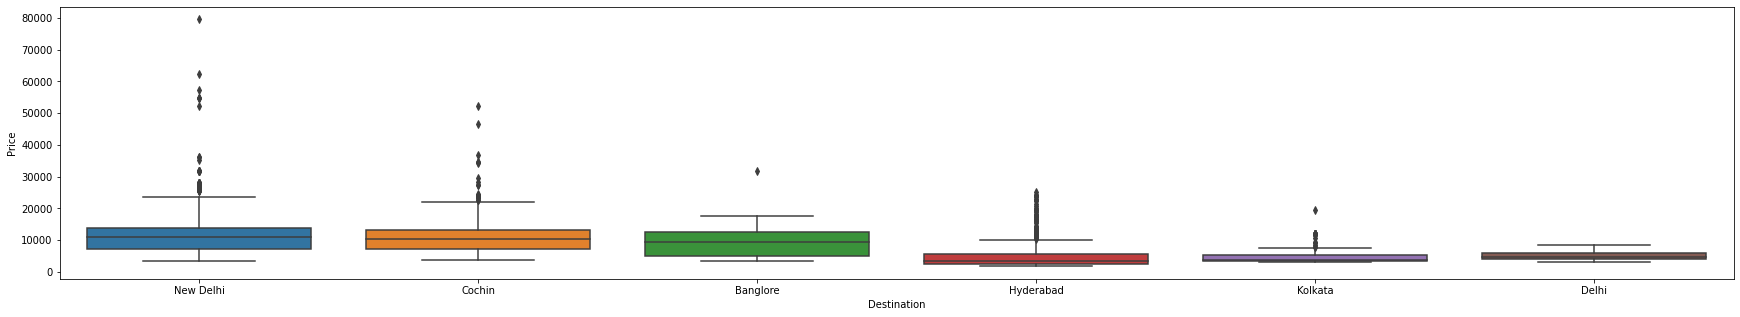

In [174]:
plt.figure(figsize = (30,5))
sb.boxplot(x = 'Destination', y = 'Price', data = train_data.sort_values('Price', ascending=False))

In [175]:
destination = pd.get_dummies(cat['Destination'],drop_first = True)        #drop first = true to avoid creating an extra column by dummy variable

In [176]:
destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [177]:
def viz(col,col2):
  sb.boxplot(x = col, y = col2, data = t1.sort_values(col2, ascending=False))
  plt.show()
  a = pd.get_dummies(t1[col],drop_first = True)
  return a

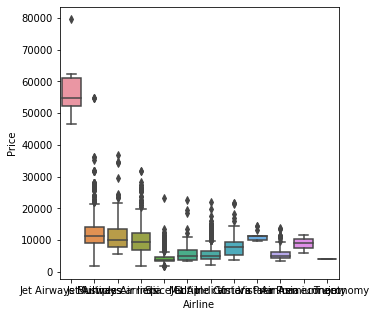

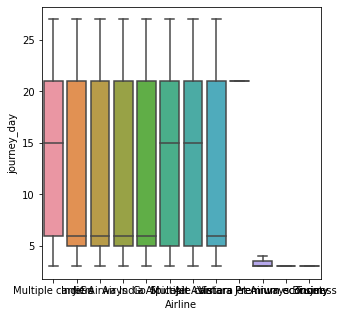

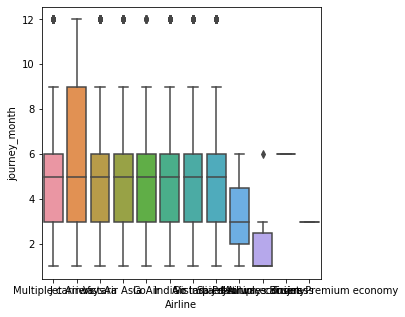

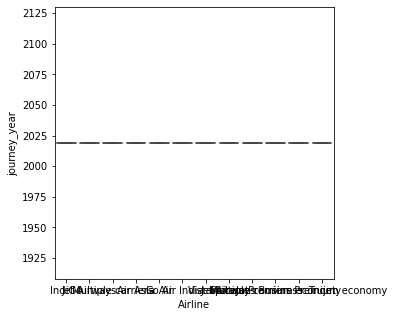

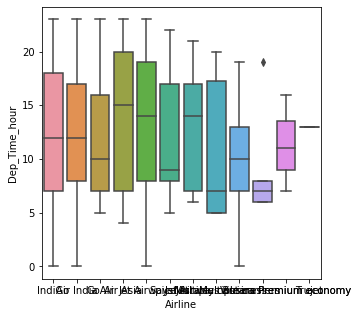

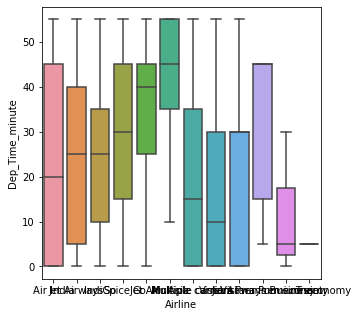

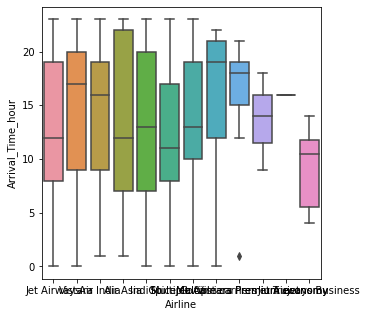

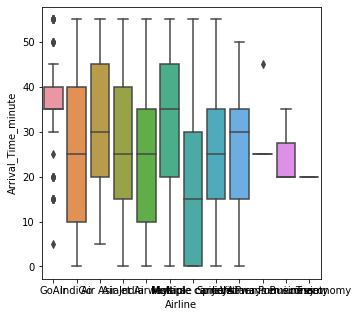

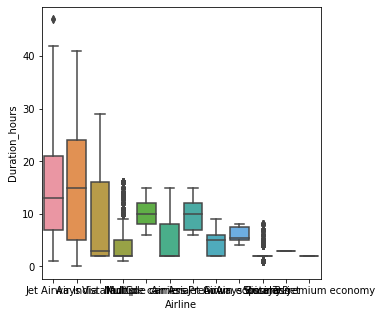

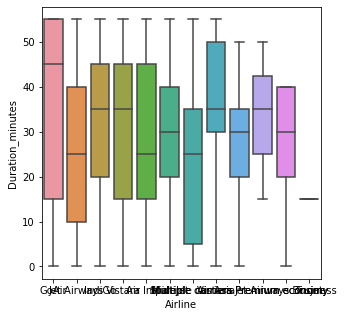

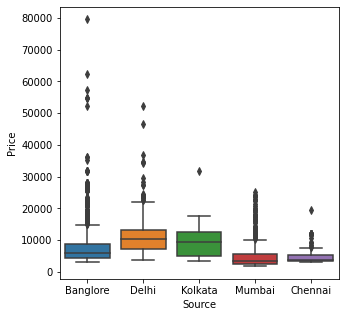

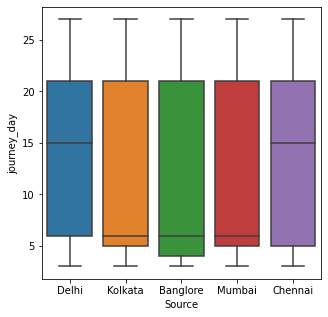

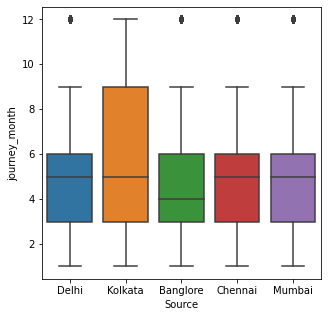

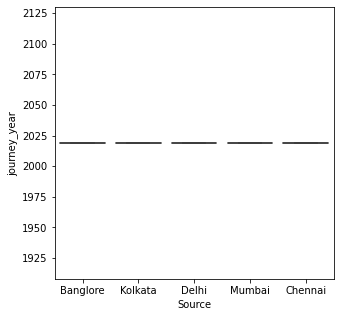

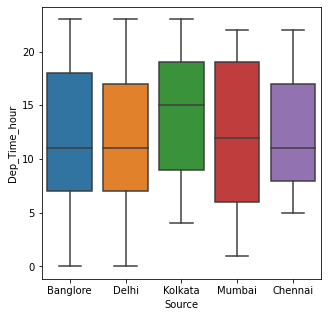

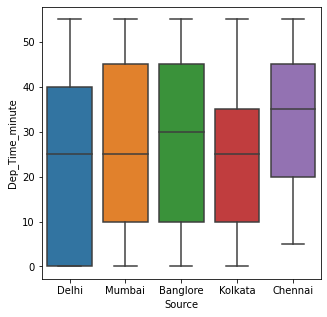

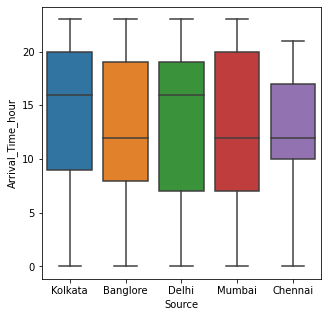

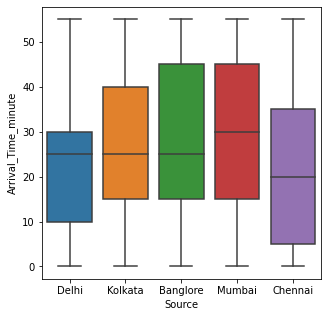

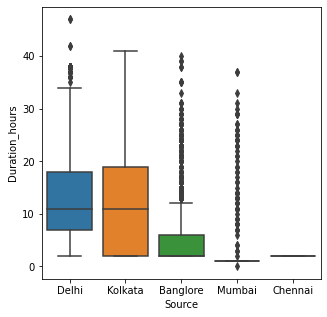

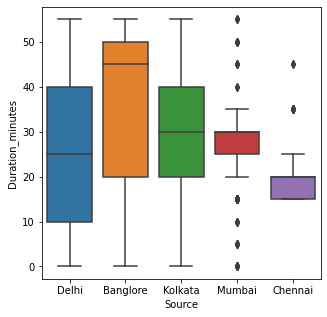

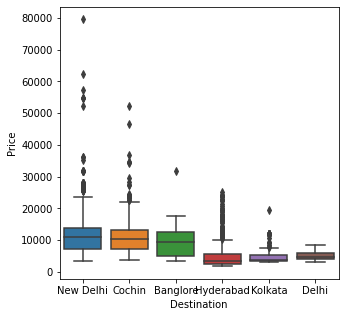

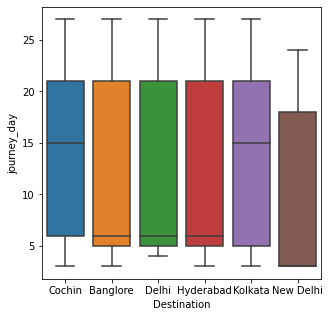

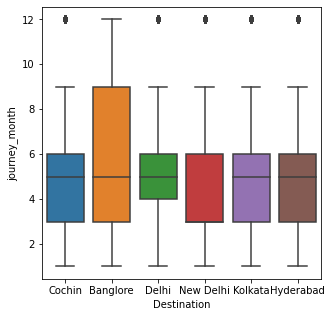

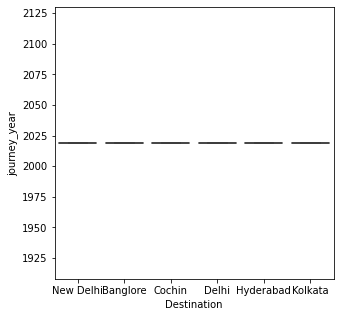

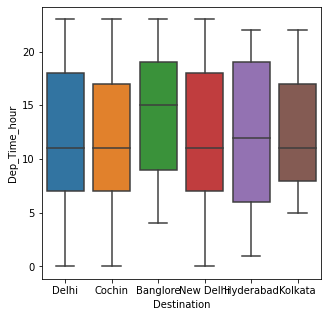

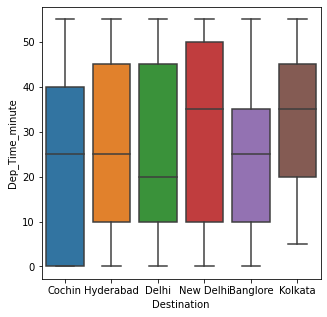

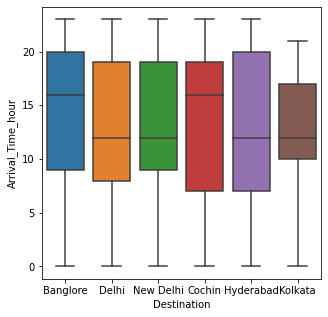

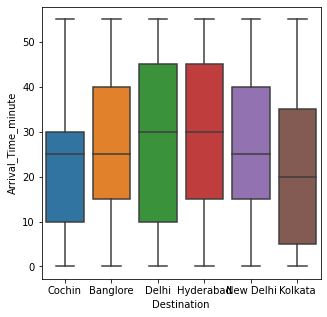

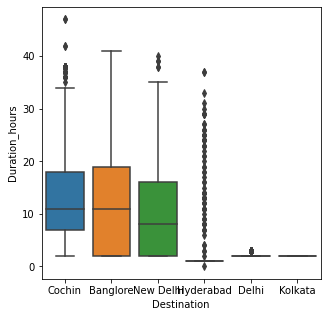

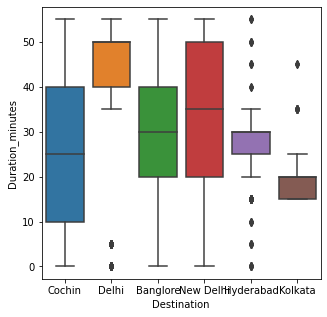

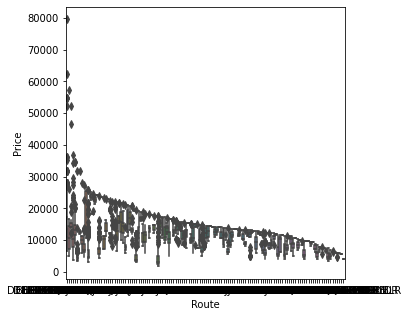

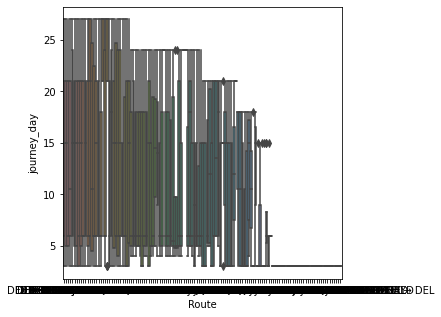

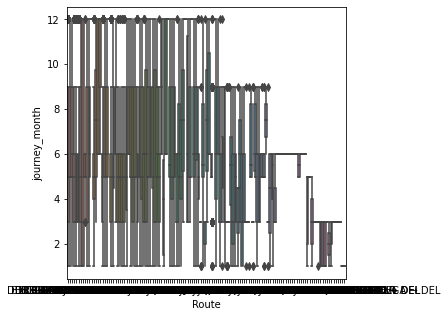

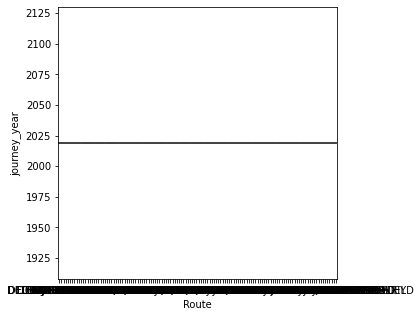

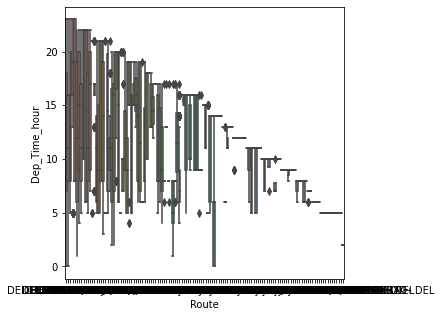

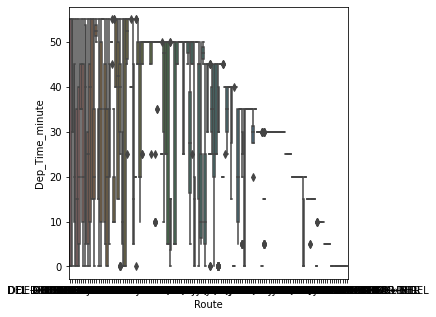

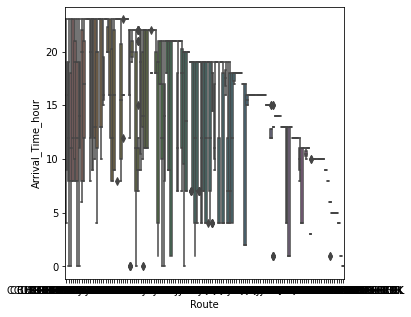

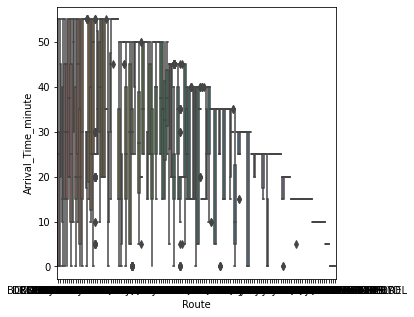

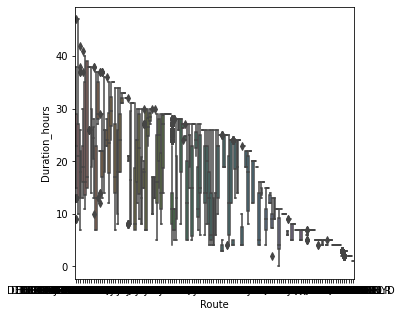

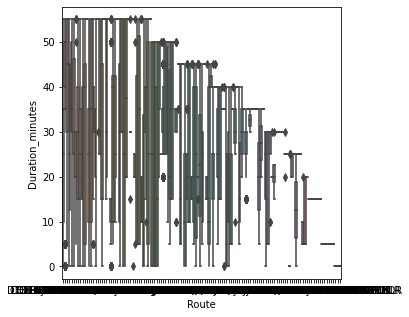

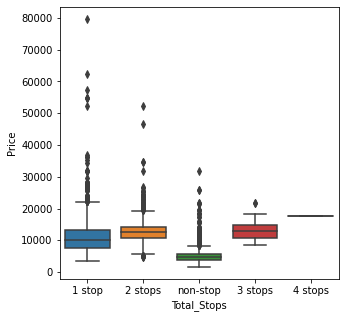

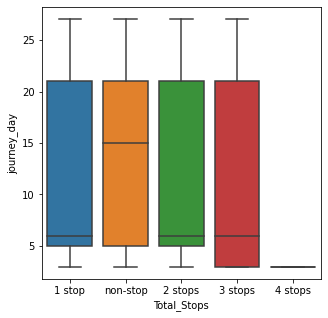

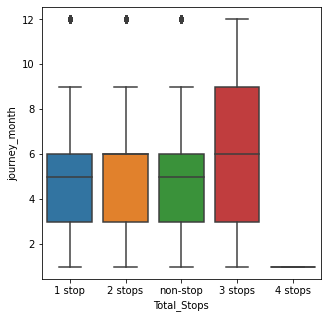

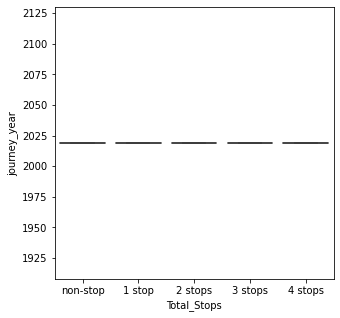

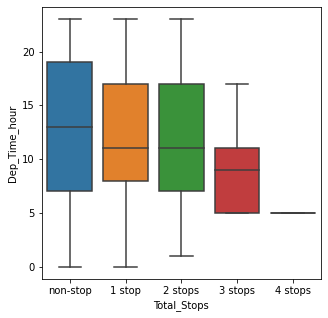

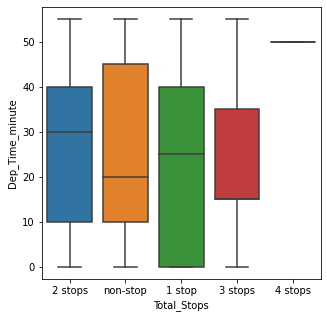

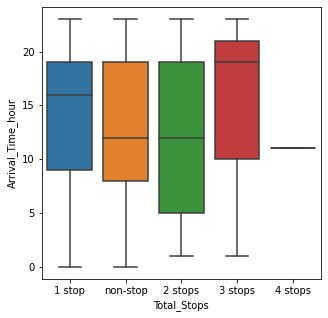

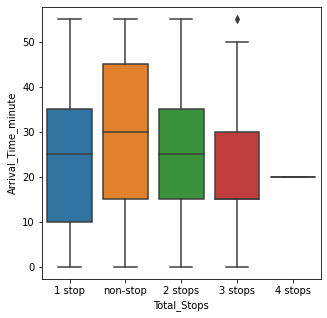

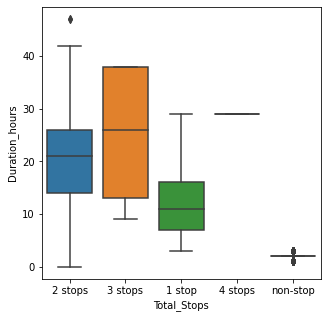

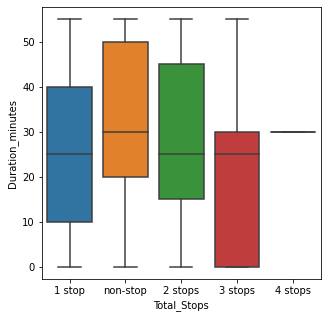

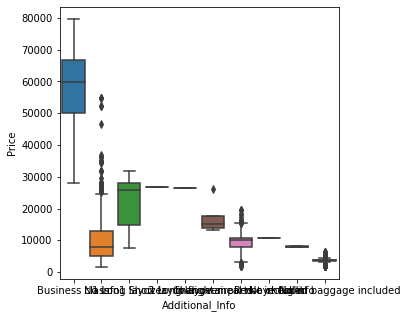

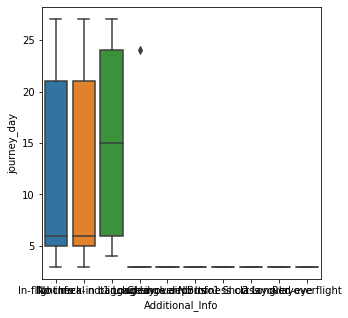

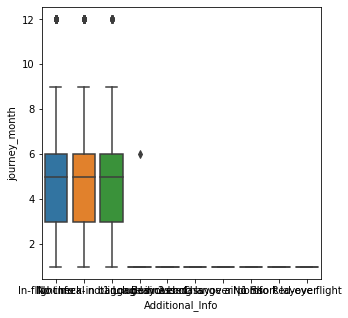

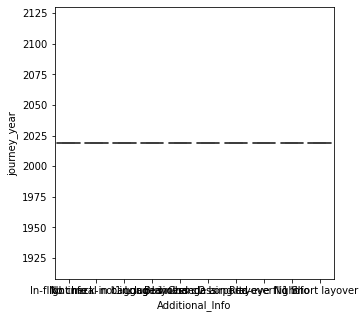

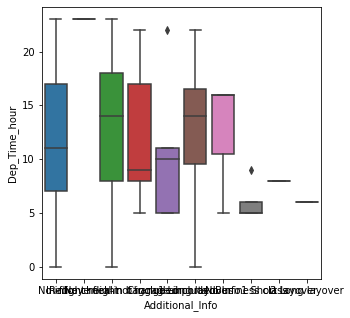

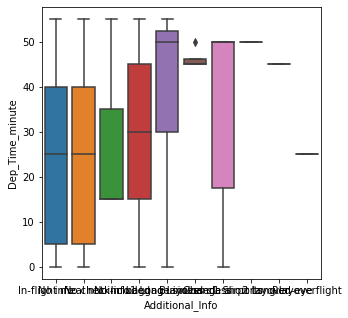

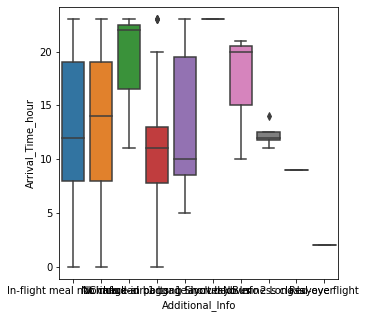

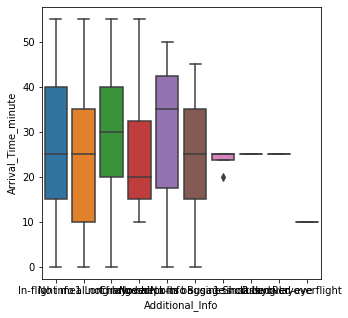

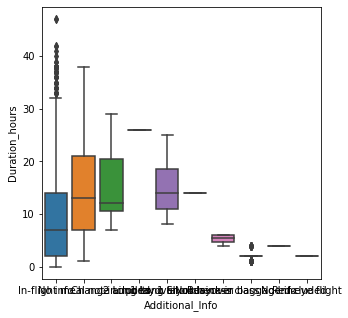

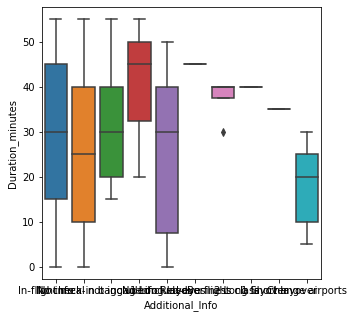

In [178]:
for i in cat_data:
  for j in cont_data:
    viz(i,j)

In [179]:
t1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              10682 non-null  object
 1   Source               10682 non-null  object
 2   Destination          10682 non-null  object
 3   Route                10682 non-null  object
 4   Total_Stops          10682 non-null  object
 5   Additional_Info      10682 non-null  object
 6   Price                10682 non-null  int64 
 7   journey_day          10682 non-null  int64 
 8   journey_month        10682 non-null  int64 
 9   journey_year         10682 non-null  int64 
 10  Dep_Time_hour        10682 non-null  int64 
 11  Dep_Time_minute      10682 non-null  int64 
 12  Arrival_Time_hour    10682 non-null  int64 
 13  Arrival_Time_minute  10682 non-null  int64 
 14  Duration_hours       10682 non-null  int64 
 15  Duration_minutes     10682 non-null  int64 
dtypes: i

In [180]:
#abcd = ['Airline', 'Destination', 'Source']
#j = []
#for i in abcd:
 # j.append(viz(i))

In [181]:
#j[1]

### Splitting Route column and replacing null values

In [182]:
cat['route1'] = cat['Route'].str.split('→').str[0]
cat['route2'] = cat['Route'].str.split('→').str[1]
cat['route3'] = cat['Route'].str.split('→').str[2]
cat['route4'] = cat['Route'].str.split('→').str[3]
cat['route5'] = cat['Route'].str.split('→').str[4]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [183]:
cat.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,route1,route2,route3,route4,route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [184]:
drop_column(cat,'Route')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [185]:
cat.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
route1                 0
route2                 0
route3              3491
route4              9116
route5             10636
dtype: int64

In [186]:
cat.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'route1', 'route2', 'route3', 'route4', 'route5'],
      dtype='object')

In [187]:
#replacing null values with NaN
for i in ['route1', 'route2', 'route3', 'route4', 'route5']:
  cat[i].fillna('None',inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [188]:
#import numpy as np

#percentiles = [98, 76.37, 55.55, 69, 88]
#first_subject = np.array(percentiles)
#print(first_subject.dtype)

###Performing label encoding

In [189]:
# printing number of features with each and every category
for i in cat.columns:
  print('{} has total {} categories'.format(i,len(cat[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
route1 has total 5 categories
route2 has total 45 categories
route3 has total 30 categories
route4 has total 14 categories
route5 has total 6 categories


In [190]:
# since route 2 and 3 have lot of categories therefore we use label encoding to reduce high dimensionality
from sklearn.preprocessing import LabelEncoder
#intialising label encoder
encoder = LabelEncoder()

In [191]:
cat.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'route1', 'route2', 'route3', 'route4', 'route5'],
      dtype='object')

In [192]:
#encoding all routes
for i in ['route1', 'route2', 'route3', 'route4', 'route5']:
  cat[i] = encoder.fit_transform(cat[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [193]:
cat.head() #all routes encoded

,Airline,Source,Destination,Total_Stops,Additional_Info,route1,route2,route3,route4,route5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [194]:
cat

,Airline,Source,Destination,Total_Stops,Additional_Info,route1,route2,route3,route4,route5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,No info,2,5,29,13,5
10679,Air India,Kolkata,Banglore,non-stop,No info,2,5,29,13,5
10680,Jet Airways,Banglore,Delhi,non-stop,No info,0,13,29,13,5
10681,Vistara,Banglore,New Delhi,non-stop,No info,0,13,29,13,5


In [195]:
cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Total_Stops      10682 non-null  object
 4   Additional_Info  10682 non-null  object
 5   route1           10682 non-null  int64 
 6   route2           10682 non-null  int64 
 7   route3           10682 non-null  int64 
 8   route4           10682 non-null  int64 
 9   route5           10682 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 918.0+ KB


In [196]:
cat.isnull()

,Airline,Source,Destination,Total_Stops,Additional_Info,route1,route2,route3,route4,route5
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
10678,False,False,False,False,False,False,False,False,False,False
10679,False,False,False,False,False,False,False,False,False,False
10680,False,False,False,False,False,False,False,False,False,False
10681,False,False,False,False,False,False,False,False,False,False


In [197]:
#since additional info has no info in it mostly therefore dropping the column
cat.drop('Additional_Info',axis=1)

,Airline,Source,Destination,Total_Stops,route1,route2,route3,route4,route5
0,IndiGo,Banglore,New Delhi,non-stop,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,0,34,8,13,5
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,2,5,29,13,5
10679,Air India,Kolkata,Banglore,non-stop,2,5,29,13,5
10680,Jet Airways,Banglore,Delhi,non-stop,0,13,29,13,5
10681,Vistara,Banglore,New Delhi,non-stop,0,13,29,13,5


In [198]:
cat['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [199]:
# to convert to label encoder
dict = {'non-stop':0, '2 stops':1, '1 stop':2, '3 stops':3, '4 stops':4}

In [200]:
cat['Total_Stops']=cat['Total_Stops'].map(dict) # mapped dict to total stops

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [201]:
cat.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,route1,route2,route3,route4,route5
0,IndiGo,Banglore,New Delhi,0,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,1,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,1,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,2,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,2,No info,0,34,8,13,5


In [202]:
#concatenating all variables
data_train = pd.concat([airline,source,destination,cat,train_data[cont_data]],axis=1)   #train_data[cat]

### Performed Label Encoding

In [203]:
data_train.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Airline,Source,Destination,Total_Stops,Additional_Info,route1,route2,route3,route4,route5,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,IndiGo,Banglore,New Delhi,0,No info,0,13,29,13,5,3897,24,3,2019,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Air India,Kolkata,Banglore,1,No info,2,25,1,3,5,7662,5,1,2019,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,Jet Airways,Delhi,Cochin,1,No info,3,32,4,5,5,13882,6,9,2019,9,25,4,25,19,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,IndiGo,Kolkata,Banglore,2,No info,2,34,3,13,5,6218,5,12,2019,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,IndiGo,Banglore,New Delhi,2,No info,0,34,8,13,5,13302,3,1,2019,16,50,21,35,4,45


In [204]:
data_train.drop(['Airline', 'Source', 'Destination', 'Additional_Info'], axis=1)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,route1,route2,route3,route4,route5,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,13,29,13,5,3897,24,3,2019,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2,25,1,3,5,7662,5,1,2019,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,3,32,4,5,5,13882,6,9,2019,9,25,4,25,19,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2,34,3,13,5,6218,5,12,2019,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,34,8,13,5,13302,3,1,2019,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,5,29,13,5,4107,4,9,2019,19,55,22,25,2,30
10679,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,5,29,13,5,4145,27,4,2019,20,45,23,20,2,35
10680,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,13,29,13,5,7229,27,4,2019,8,20,11,20,3,0
10681,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,13,29,13,5,12648,3,1,2019,11,30,14,10,2,40


### Handling Outliers

In [205]:
def plot(df,col):
  fig,(axis1,axis2) = plt.subplots(2,1)        #matrix of 2 rows 1 column axis1 = distribution axis2 = boxplot
  sb.distplot(df[col],ax=axis1)
  sb.boxplot(df[col],ax=axis2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


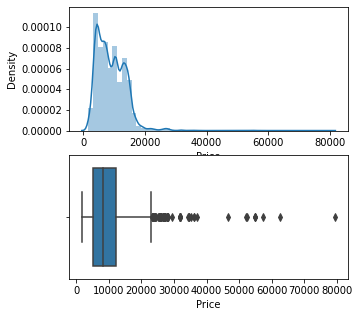

In [206]:
plot(data_train,'Price')
plt.rcParams['figure.figsize']=10,10

In [207]:
#outliers after 40000 therefore removing
data_train['Price'] = np.where(data_train['Price']>=40000,data_train['Price'].median(),data_train['Price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


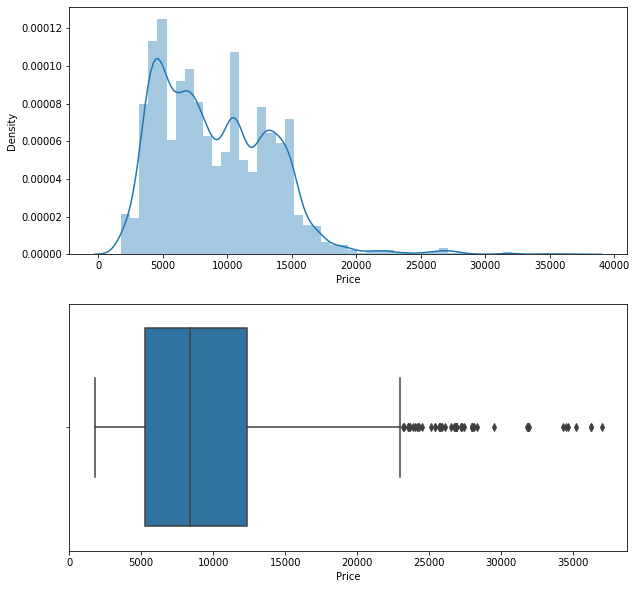

In [208]:
plot(data_train,'Price')
plt.rcParams['figure.figsize']=10,10

###Separating Independent and Dependent features

In [209]:
# y axis = dependent features   x axis = independent features
x = data_train.drop(['Airline', 'Source', 'Destination', 'Additional_Info','Price'],axis=1)    #dropping Price as it itself has to be predicted hence can't be independent
x.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,route1,route2,route3,route4,route5,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,13,29,13,5,24,3,2019,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2,25,1,3,5,5,1,2019,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,3,32,4,5,5,6,9,2019,9,25,4,25,19,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2,34,3,13,5,5,12,2019,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,34,8,13,5,3,1,2019,16,50,21,35,4,45


In [210]:
y = data_train['Price']

In [211]:
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

###Feature Selection

In [212]:
#using mutual information selection
from sklearn.feature_selection import mutual_info_classif

In [213]:
mutual_info_classif(x,y)

array([0.75178338, 0.09939481, 0.68243142, 0.90668901, 0.        ,
       0.55266485, 0.0040805 , 0.31613341, 0.00785907, 0.23267547,
       0.00779472, 0.16698094, 1.58086272, 0.86571579, 0.29099176,
       1.52441977, 0.41462966, 0.29009299, 0.16809056, 0.37206332,
       2.18212268, 2.01004795, 2.76389843, 2.26038502, 1.46203737,
       0.75607321, 1.10399807, 0.86332802, 1.50704103, 1.4296467 ,
       1.22856445, 1.82754751, 1.5466252 , 1.78665329, 1.07727486])

In [214]:
imp = pd.DataFrame(mutual_info_classif(x,y),index = x.columns)     #importance dataframe where the importance is returned

In [215]:
imp   #telling contribution to the dataframe

,0
Air India,0.774767
GoAir,0.097023
IndiGo,0.673523
Jet Airways,0.918226
Jet Airways Business,0.008284
Multiple carriers,0.573267
Multiple carriers Premium economy,0.000000
SpiceJet,0.322556
Trujet,0.005650
Vistara,0.231034


In [216]:
imp.columns = ['Importance']      #renaming column name

In [217]:
#sorting column
imp.sort_values(by = 'Importance', ascending=False)       #jet airways has least relevance to the dataframe, hence can be skipped if desired

,Importance
route2,2.798689
route3,2.286027
Total_Stops,2.179919
route1,2.056673
Arrival_Time_hour,1.843831
Duration_hours,1.780656
Delhi,1.550141
Arrival_Time_minute,1.542934
route4,1.501272
Cochin,1.489722


##Implementing Machine Learning models

###Splitting data into training and testing

In [218]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [219]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)     #test size if 20% of total data

In [220]:
def predict(ml_model):                                                       #function to train the dataset as well as calculate RMS, MS, r^2 value, mean absolute error
  model = ml_model.fit(X_train, y_train)
  print("Training score : {}".format(model.score(X_train, y_train)))
  y_prediction = model.predict(X_test)
  print("Predictions are :\n {}".format(y_prediction))
  print("\n")

  #calculating metrics
  r2_score = metrics.r2_score(y_test, y_prediction)
  print("R squared value is : {}".format(r2_score))
  print("\nMean Absolute Error : ", metrics.mean_absolute_error(y_test, y_prediction))
  print("\nMean Squared Error : ", metrics.mean_squared_error(y_test, y_prediction))
  print("\nRoot Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))

  #plotting actual vs predicted values of flight fare
  sb.distplot(y_test-y_prediction)          #y_test = actual fares y_prediction = predicted values. this will calculate difference between the values and plot the difference.
                                            #if the distribution happens to be normal distribution then it is working vv good

###Random Forest

In [221]:
from sklearn.ensemble import RandomForestRegressor      #since regression is done

Training score : 0.9524305825268337
Predictions are :
 [16770.      6159.05    8792.84   ...  6892.65   12617.5475 13068.118 ]


R squared value is : 0.8322344407224027

Mean Absolute Error :  1142.0989327035986

Mean Squared Error :  3435800.2588860434

Root Mean Squared Error :  1853.591179005242


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


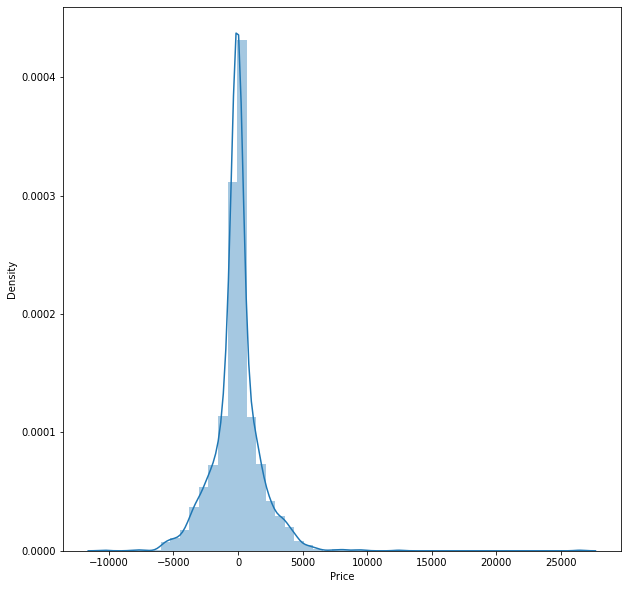

In [222]:
predict(RandomForestRegressor())

###Decision Trees

####Using predict function

In [223]:
from sklearn.tree import DecisionTreeClassifier

Training score : 0.8827384435342306
Predictions are :
 [14067.  5752.  9187. ...  6152. 13339. 10539.]


R squared value is : 0.7098830459544019

Mean Absolute Error :  1360.8671034160038

Mean Squared Error :  5941528.822180627

Root Mean Squared Error :  2437.525142881736


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


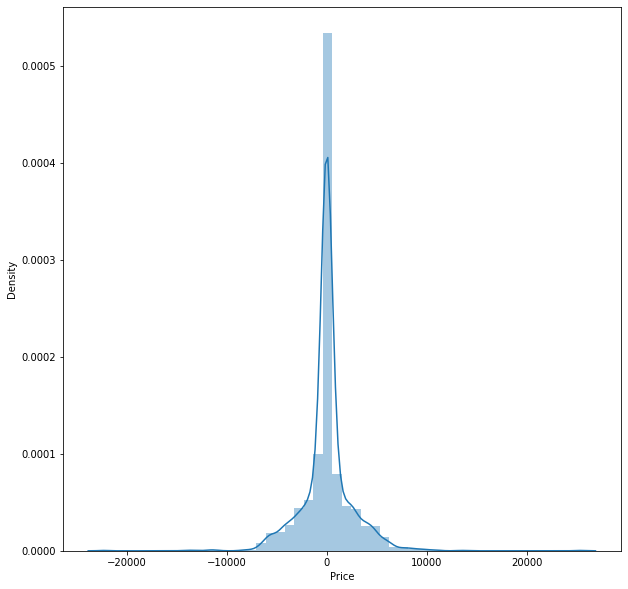

In [224]:
predict(DecisionTreeClassifier())

####Gini Index Classifier

In [225]:
from sklearn.tree import DecisionTreeClassifier

In [226]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)      #initialised Gini index

In [227]:
clf_gini.fit(X_train, y_train)      #fitted the model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [228]:
y_pred_gini = clf_gini.predict(X_test)

In [229]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.0969


In [230]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([ 3597., 10262.,  3597., ...,  3597.,  3597., 10262.])

In [231]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.0987


In [232]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.0987
Test set score: 0.0969




---


Since training and test score values are very close therefore no sign of overfitting


---



[Text(837.0, 951.3000000000001, 'X[16] <= 0.5\ngini = 0.996\nsamples = 8545\nvalue = [4, 1, 29 ... 1, 1, 1]'),
 Text(418.5, 679.5, 'X[3] <= 0.5\ngini = 0.996\nsamples = 7530\nvalue = [4, 1, 29 ... 1, 1, 1]'),
 Text(209.25, 407.70000000000005, 'X[22] <= 5.5\ngini = 0.996\nsamples = 4782\nvalue = [4, 0, 29 ... 0, 0, 1]'),
 Text(104.625, 135.89999999999998, 'gini = 0.949\nsamples = 788\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 Text(313.875, 135.89999999999998, 'gini = 0.997\nsamples = 3994\nvalue = [4, 0, 29 ... 0, 0, 1]'),
 Text(627.75, 407.70000000000005, 'X[12] <= 0.5\ngini = 0.981\nsamples = 2748\nvalue = [0, 1, 0 ... 1, 1, 0]'),
 Text(523.125, 135.89999999999998, 'gini = 0.97\nsamples = 1511\nvalue = [0, 1, 0 ... 1, 1, 0]'),
 Text(732.375, 135.89999999999998, 'gini = 0.95\nsamples = 1237\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 Text(1255.5, 679.5, 'X[3] <= 0.5\ngini = 0.951\nsamples = 1015\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 Text(1046.25, 407.70000000000005, 'X[2] <= 0.5\ngini = 0.942\nsamples = 7

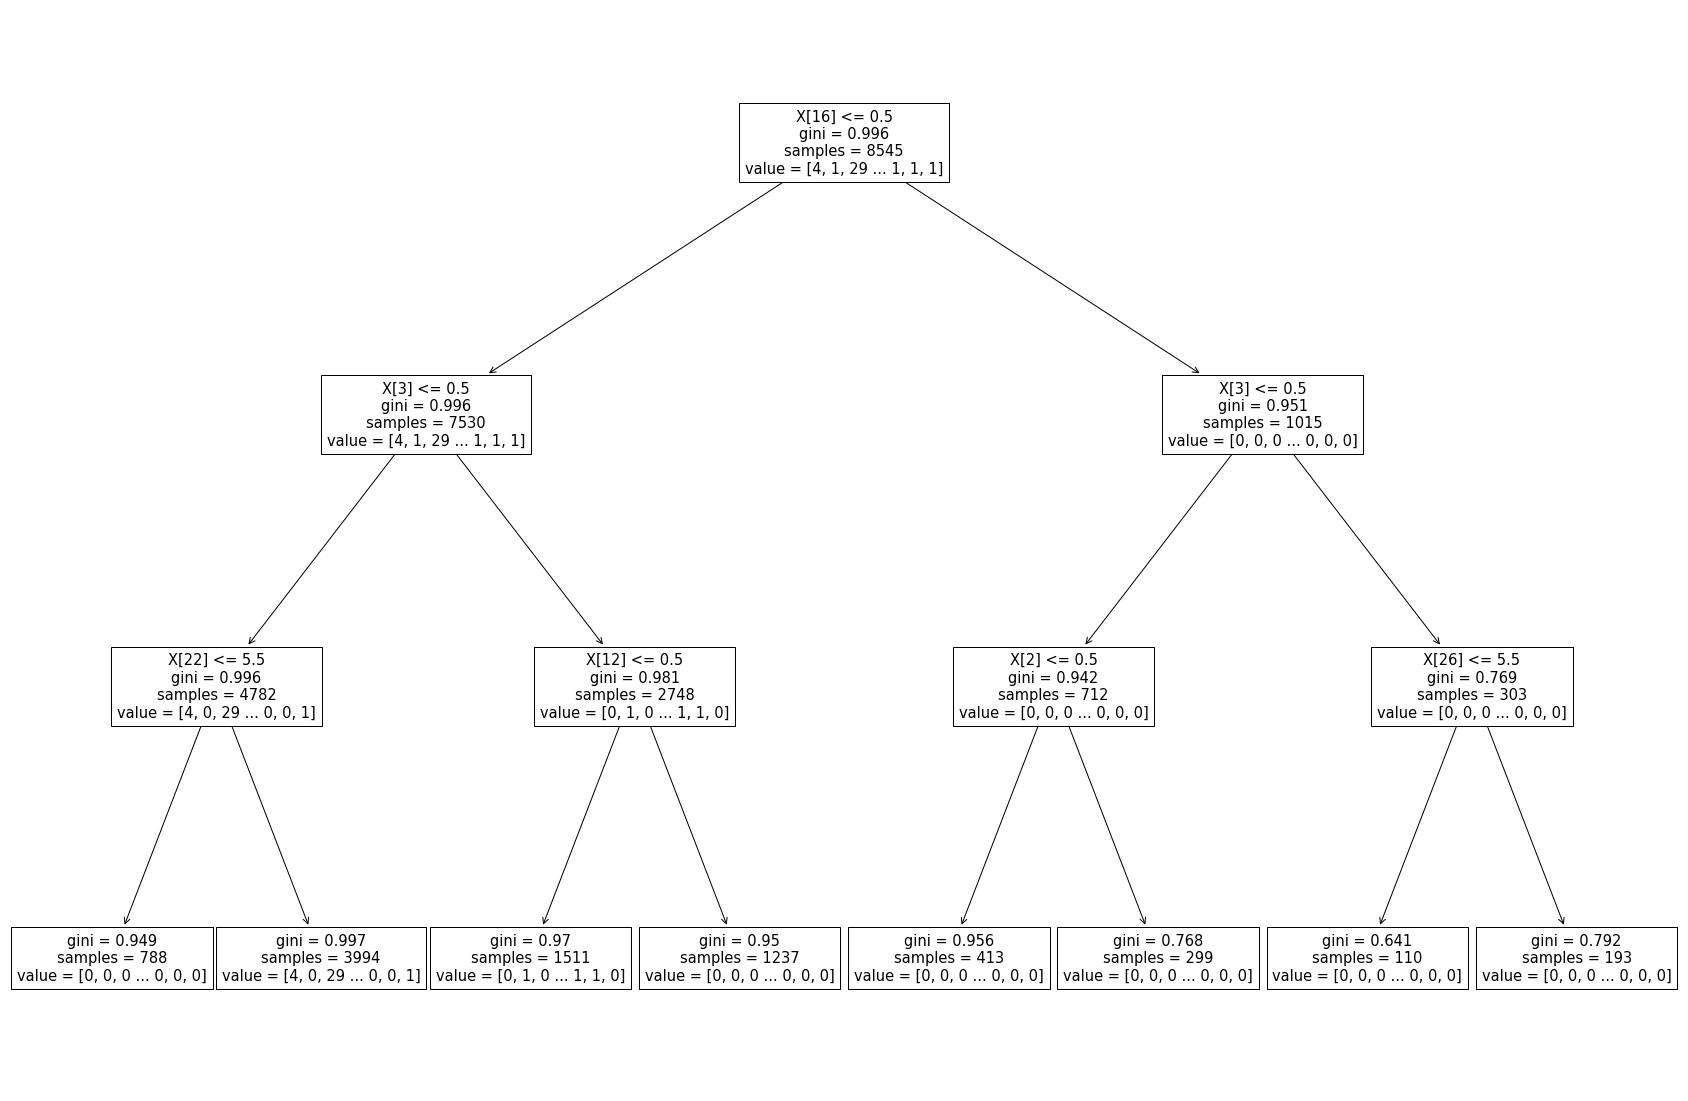

In [233]:
plt.figure(figsize=(30,20))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

####Entropy method classifier

In [234]:
from sklearn.tree import DecisionTreeClassifier

In [235]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)     #initialised entropy criteria

In [236]:
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [237]:
y_pred_en = clf_en.predict(X_test)    #prediction on test set

In [238]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.0955


In [239]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en                               #prediction on training set

array([13377., 10262., 10262., ..., 13377.,  7229., 10262.])

In [240]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.0988


In [241]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.0988
Test set score: 0.0955




---


Since training and test score values are very close therefore no sign of overfitting


---



[Text(837.0, 951.3000000000001, 'X[21] <= 2.5\nentropy = 9.311\nsamples = 8545\nvalue = [4, 1, 29 ... 1, 1, 1]'),
 Text(418.5, 679.5, 'X[23] <= 27.5\nentropy = 8.126\nsamples = 4616\nvalue = [4, 1, 29 ... 1, 1, 0]'),
 Text(209.25, 407.70000000000005, 'X[3] <= 0.5\nentropy = 7.657\nsamples = 2313\nvalue = [0, 0, 0 ... 1, 1, 0]'),
 Text(104.625, 135.89999999999998, 'entropy = 8.058\nsamples = 974\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 Text(313.875, 135.89999999999998, 'entropy = 5.68\nsamples = 1339\nvalue = [0, 0, 0 ... 1, 1, 0]'),
 Text(627.75, 407.70000000000005, 'X[21] <= 0.5\nentropy = 6.605\nsamples = 2303\nvalue = [4, 1, 29 ... 0, 0, 0]'),
 Text(523.125, 135.89999999999998, 'entropy = 5.752\nsamples = 1247\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 Text(732.375, 135.89999999999998, 'entropy = 5.499\nsamples = 1056\nvalue = [4, 1, 29 ... 0, 0, 0]'),
 Text(1255.5, 679.5, 'X[20] <= 1.5\nentropy = 8.591\nsamples = 3929\nvalue = [0, 0, 0 ... 0, 0, 1]'),
 Text(1046.25, 407.70000000000005, 'X[23] <=

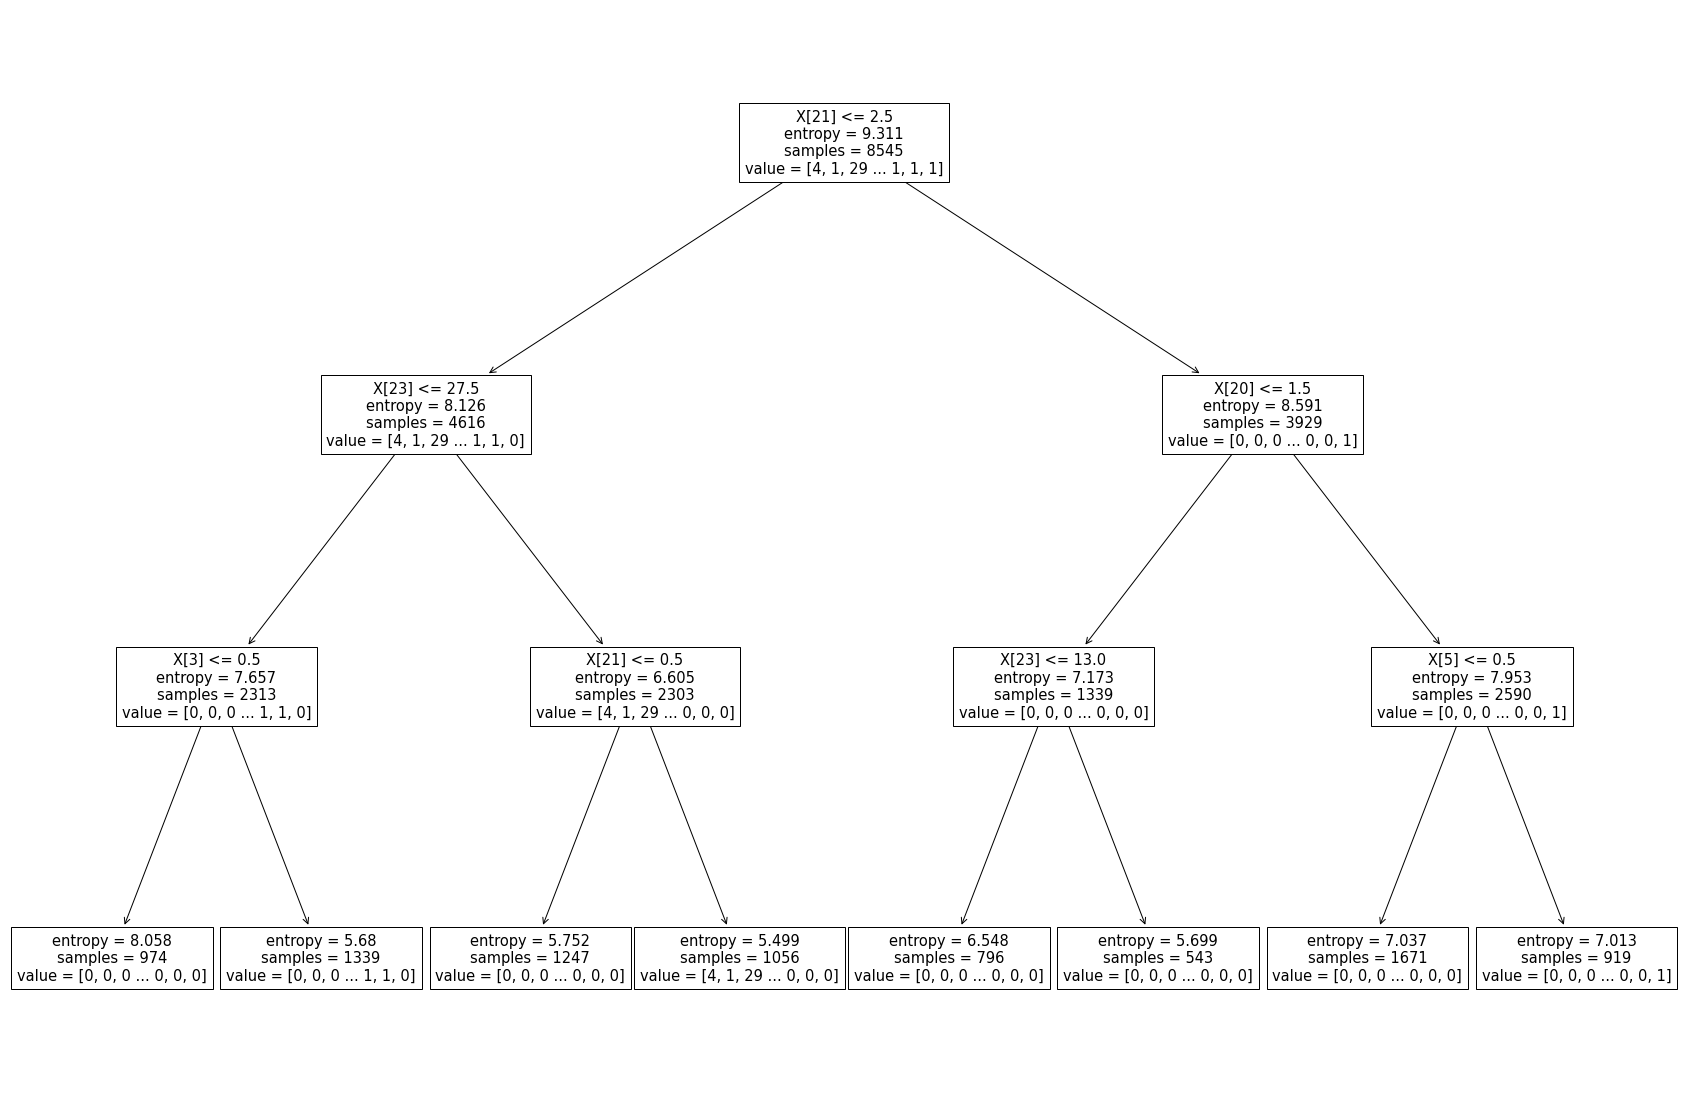

In [242]:
plt.figure(figsize=(30,20))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

###Linear Regression

In [243]:
from sklearn.linear_model import LinearRegression

Training score : 0.6136700546909868
Predictions are :
 [12474.62995864  8375.51024103  9541.72649768 ...  7145.70559164
 10842.61137136 11701.91344189]


R squared value is : 0.6094336217492035

Mean Absolute Error :  1957.9872374328627

Mean Squared Error :  7998710.040872281

Root Mean Squared Error :  2828.1990808414253


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


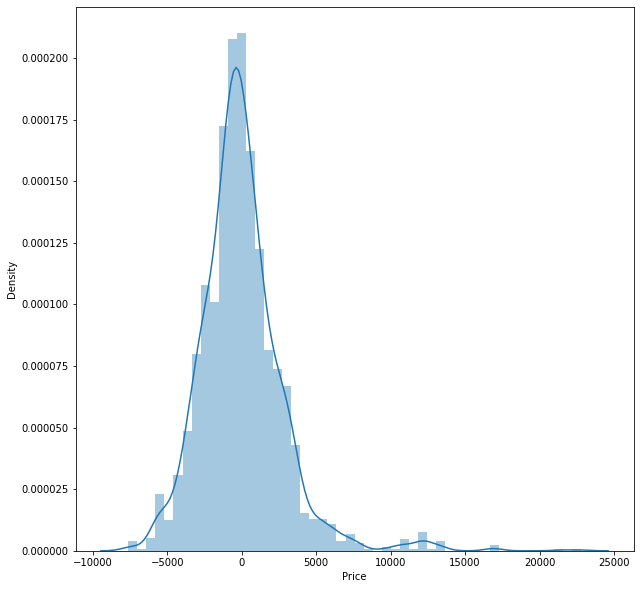

In [244]:
predict(LinearRegression())